ModuleNotFoundError: No module named 'skleran'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split # Corrected the typo in module and function name
from sklearn.preprocessing import StandardScaler, LabelEncoder # Corrected the typo in class names
import pickle

In [ ]:
# load the dataset
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Churn_Modelling.csv'

In [ ]:
#droppping irrevelent columns
data = data.drop(["RowNumber","CustomerId","Surname"],axis = 1,)

#geography and gender is a catagorical variable
# so we we encode the catagorical variable (gender)
label1_encoder_gender = LabelEncoder()
data["Gender"] = label1_encoder_gender.fit_transform(data["Gender"])
data

In [ ]:
#geography (one hot encode)
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoded = onehot_encoder_geo.fit_transform(data[["Geography"]])
geo_encoded

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [ ]:
onehot_encoder_geo.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [ ]:
geo_encoded_df = pd.DataFrame(geo_encoded.toarray(), columns = onehot_encoder_geo.get_feature_names_out(["Geography"]))
geo_encoded_df


NameError: name 'pd' is not defined

In [ ]:
#combine one hot encoder columns with the original
data = pd.concat([data.drop("Geography",axis = 1),geo_encoded_df],axis = 1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [ ]:
  ## save the encoders and scalers
  with open("label_encoder_gender.pkl","wb") as f:
    pickle.dump(label1_encoder_gender,f)
  with open("onehot_encoder_geo.pkl","wb") as f:
    pickle.dump(onehot_encoder_geo,f)

In [ ]:
## devide the dataset into independent and dependent dataset
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [ ]:
x  = data.drop("Exited",axis = 1)#independent
y = data["Exited"]#dependent
#splt the data in training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


# scale this features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [ ]:
with open("scaler.pkl","wb") as f:
  pickle.dump(scaler,f)

In [ ]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [ ]:
x_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [ ]:
x_train.shape

(8000, 12)

In [ ]:
#part 2 now create the ANn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [ ]:
## initializing ann
classifier = Sequential()


In [ ]:
## Ading the input layer
classifier.add(Dense(units = 12,activation = "relu"))


In [ ]:
## adding the first hidden layer
classifier.add(Dense(units = 12,activation = "relu"))
classifier.add(Dropout(0.3) )

In [ ]:
## adidng the second hidden layer
classifier.add(Dense(units = 6,activation = "relu"))
classifier.add(Dropout(0.4) )

In [ ]:
#o/p layer
classifier.add(Dense(units = 1,activation = "sigmoid"))

In [ ]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
classifier.compile(optimizer = "adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [ ]:
# adam optimizer has own learning rate ,if want to specifey:
#import tensorflow
#tensorflow.keras.optimizers,Adam(learning_rate=0.01)

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6855 - loss: 0.6141 - val_accuracy: 0.7910 - val_loss: 0.4671
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7959 - loss: 0.4865 - val_accuracy: 0.7910 - val_loss: 0.4425
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8064 - loss: 0.4670 - val_accuracy: 0.7917 - val_loss: 0.4357
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8041 - loss: 0.4547 - val_accuracy: 0.7989 - val_loss: 0.4266
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.4443 - val_accuracy: 0.8277 - val_loss: 0.4120
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8119 - loss: 0.4400 - val_accuracy: 0.8406 - val_loss: 0.4003
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8216 - loss: 0.4226 - val_accuracy: 0.8425 - val_loss: 0.3906
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8331 - loss: 0.4036 - 

In [ ]:
model_history.history.keys()#shows what are we dealing with


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

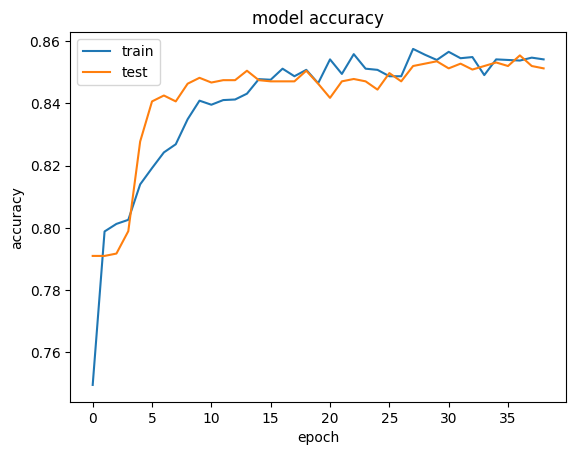

In [ ]:
#summarise history for accuracey
import matplotlib.pyplot as plt
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()

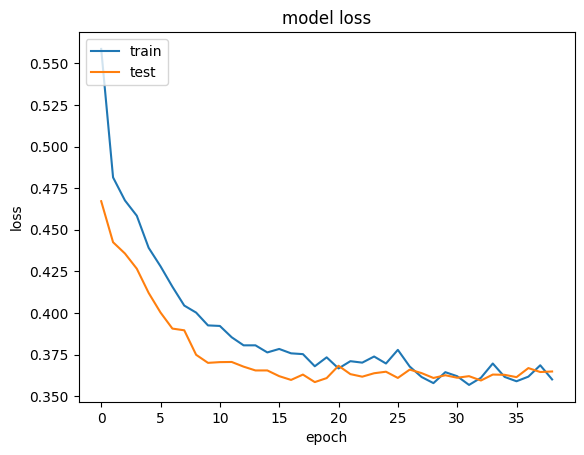

In [ ]:
# plotting for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()


In [ ]:
#prediction for test data
#predicting the test set
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm# we get -1492-true negative,115-false positive,118-false negative ,205-true positive

array([[1492,  115],
       [ 188,  205]])

In [ ]:
## calculate the accuracey
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [ ]:
# ann and rnn are black bos model
# linera regression and dt are white box model
#random forest is also black box model